In [142]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [143]:
from os import listdir
import glob
csvs = glob.glob('./Player A-*.csv')
csvs

['./Player A-moves-status-Sun Oct 20 09:41:02 2019.csv',
 './Player A-moves-status-Sun Oct 20 09:39:42 2019.csv',
 './Player A-moves-status-Sun Oct 20 09:49:42 2019.csv',
 './Player A-moves-status-Sat Oct 19 20:36:40 2019.csv',
 './Player A-moves-status-Sun Oct 20 09:46:24 2019.csv',
 './Player A-moves-status-Sun Oct 20 09:37:02 2019.csv',
 './Player A-moves-status-Sat Oct 19 19:08:52 2019.csv',
 './Player A-moves-status-Sun Oct 20 09:48:28 2019.csv',
 './Player A-moves-status-Sat Oct 19 19:29:14 2019.csv',
 './Player A-moves-status-Sun Oct 20 09:45:31 2019.csv']

In [144]:
data = pd.DataFrame()
cols = [f'c{i}' for i in range(25)] + ['status', 'attack']
for f in csvs:
    df = pd.read_csv(f, index_col=None, header=None, names=cols)
    data = pd.concat([data, df])
data.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c17,c18,c19,c20,c21,c22,c23,c24,status,attack
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,N/A,A2
1,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,Miss,D3
2,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,Miss,B4
3,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,Miss,E1
4,0,0,0,0,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,Hit,D1


In [145]:
# drop status 'won' because game is over and we don't have to predict
df = data.dropna(how='any') 
print(f"dropped {len(data) - len(df)} rows")

dropped 10 rows


In [146]:
df.status.unique()
df.status = df.status.apply(str.strip).apply(str.lower).apply(lambda v: v.replace(' ', '_')).apply(lambda v: 'na' if v == 'n/a' else v)
df.attack = df.attack.apply(str.strip).apply(str.lower)
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c17,c18,c19,c20,c21,c22,c23,c24,status,attack
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,na,a2
1,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,miss,d3
2,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,miss,b4
3,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,miss,e1
4,0,0,0,0,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,hit,d1


In [147]:
df.loc[:, df.columns.str.startswith('c')]
scalar = StandardScaler(with_mean=True, with_std=True)
scalar.fit(df.loc[:, df.columns.str.startswith('c')])
df.to_numpy()

array([[0, 0, 0, ..., 0, 'na', 'a2'],
       [0, 0, 0, ..., 0, 'miss', 'd3'],
       [0, 0, 0, ..., 0, 'miss', 'b4'],
       ...,
       [1, 0, 0, ..., 0, 'ship_sunk', 'e1'],
       [1, 0, 0, ..., 0, 'hit', 'd1'],
       [1, 0, 0, ..., 0, 'miss', 'e2']], dtype=object)

In [148]:
df_scaled = scalar.transform(df.loc[:, df.columns.str.startswith('c')])
print(df_scaled)
df.loc[:, df.columns.str.startswith('c')] = df_scaled

[[ 0.33583025  0.42895221  0.50421948 ... -0.0411345  -0.09471124
   0.        ]
 [ 0.33583025  0.42895221  0.50421948 ... -0.0411345  -0.09471124
   0.        ]
 [ 0.33583025  0.42895221  0.50421948 ... -0.0411345  -0.09471124
   0.        ]
 ...
 [ 1.9925928   0.42895221  0.50421948 ... -0.0411345  -0.09471124
   0.        ]
 [ 1.9925928   0.42895221  0.50421948 ... -0.0411345  -0.09471124
   0.        ]
 [ 1.9925928   0.42895221  0.50421948 ... -0.0411345  -0.09471124
   0.        ]]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [149]:
df

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c17,c18,c19,c20,c21,c22,c23,c24,status,attack
0,0.335830,0.428952,0.504219,0.374939,0.237391,-0.069919,0.380166,-0.097180,0.065955,0.036786,...,-0.077821,-0.562017,-0.769024,-0.439941,-0.141598,-0.041135,-0.094711,0.0,na,a2
1,0.335830,0.428952,0.504219,0.374939,0.237391,-1.794584,0.380166,-0.097180,0.065955,0.036786,...,-0.077821,-0.562017,-0.769024,-0.439941,-0.141598,-0.041135,-0.094711,0.0,miss,d3
2,0.335830,0.428952,0.504219,0.374939,0.237391,-1.794584,0.380166,-0.097180,0.065955,0.036786,...,-0.077821,-0.562017,-0.769024,-0.439941,-0.141598,-0.041135,-0.094711,0.0,miss,b4
3,0.335830,0.428952,0.504219,0.374939,0.237391,-1.794584,0.380166,-0.097180,0.065955,0.036786,...,-0.077821,-0.562017,-0.769024,-0.439941,-0.141598,-0.041135,-0.094711,0.0,miss,e1
4,0.335830,0.428952,0.504219,0.374939,1.764951,-1.794584,0.380166,-0.097180,0.065955,0.036786,...,-0.077821,-0.562017,-0.769024,-0.439941,-0.141598,-0.041135,-0.094711,0.0,hit,d1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,1.992593,0.428952,0.504219,0.374939,0.237391,-0.069919,0.380166,-2.494275,0.065955,0.036786,...,1.567538,1.286395,1.300350,-0.439941,-0.141598,-0.041135,-0.094711,0.0,hit,a2
7,1.992593,0.428952,0.504219,0.374939,0.237391,1.654746,0.380166,-2.494275,0.065955,0.036786,...,1.567538,1.286395,1.300350,-0.439941,-0.141598,-0.041135,-0.094711,0.0,hit,a3
8,1.992593,0.428952,0.504219,0.374939,0.237391,1.654746,0.380166,-2.494275,0.065955,0.036786,...,1.567538,1.286395,1.300350,-0.439941,-0.141598,-0.041135,-0.094711,0.0,ship_sunk,e1
9,1.992593,0.428952,0.504219,0.374939,1.764951,1.654746,0.380166,-2.494275,0.065955,0.036786,...,1.567538,1.286395,1.300350,-0.439941,-0.141598,-0.041135,-0.094711,0.0,hit,d1


# First try with attack column as target with 25 classes

In [6]:
df = pd.get_dummies(df, columns=['status', 'attack'])
df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,attack_d1,attack_d2,attack_d3,attack_d4,attack_d5,attack_e1,attack_e2,attack_e3,attack_e4,attack_e5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
y = df[df.columns[df.columns.str.contains('attack')]]
X = df.drop(columns=y.columns)
y.head(), X.head()

(   attack_a1  attack_a2  attack_a3  attack_a4  attack_a5  attack_b1  \
 0          0          1          0          0          0          0   
 1          0          0          0          0          0          0   
 2          0          0          0          0          0          0   
 3          0          0          0          0          0          0   
 4          0          0          0          0          0          0   
 
    attack_b2  attack_b3  attack_b4  attack_b5  ...  attack_d1  attack_d2  \
 0          0          0          0          0  ...          0          0   
 1          0          0          0          0  ...          0          0   
 2          0          0          1          0  ...          0          0   
 3          0          0          0          0  ...          0          0   
 4          0          0          0          0  ...          1          0   
 
    attack_d3  attack_d4  attack_d5  attack_e1  attack_e2  attack_e3  \
 0          0          0      

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
len(X_train), len(X_test)

(118, 30)

In [20]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
classifier.score(X_test, y_test)

0.0

# Second try with attack column split into attack_col and attack_row
### one model to predict col and another model to predict row

<BarContainer object of 25 artists>

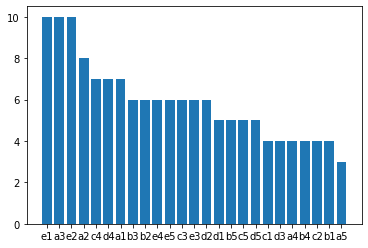

In [150]:
# unbalanced classed need to balance it
avc = df.attack.value_counts()
plt.bar(avc.index, avc.values)

In [151]:
# split attack into attack_col and attack_row to train two models one to detect col and another model to detect row
exp_cols = df.attack.apply(lambda v: v[0] + ' ' + v[1]).str.split(expand=True)
df['attack_col'], df['attack_row'] = exp_cols[0], exp_cols[1]
df.drop(columns=['attack'], inplace=True)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c18,c19,c20,c21,c22,c23,c24,status,attack_col,attack_row
0,0.33583,0.428952,0.504219,0.374939,0.237391,-0.069919,0.380166,-0.09718,0.065955,0.036786,...,-0.562017,-0.769024,-0.439941,-0.141598,-0.041135,-0.094711,0.0,na,a,2
1,0.33583,0.428952,0.504219,0.374939,0.237391,-1.794584,0.380166,-0.09718,0.065955,0.036786,...,-0.562017,-0.769024,-0.439941,-0.141598,-0.041135,-0.094711,0.0,miss,d,3
2,0.33583,0.428952,0.504219,0.374939,0.237391,-1.794584,0.380166,-0.09718,0.065955,0.036786,...,-0.562017,-0.769024,-0.439941,-0.141598,-0.041135,-0.094711,0.0,miss,b,4
3,0.33583,0.428952,0.504219,0.374939,0.237391,-1.794584,0.380166,-0.09718,0.065955,0.036786,...,-0.562017,-0.769024,-0.439941,-0.141598,-0.041135,-0.094711,0.0,miss,e,1
4,0.33583,0.428952,0.504219,0.374939,1.764951,-1.794584,0.380166,-0.09718,0.065955,0.036786,...,-0.562017,-0.769024,-0.439941,-0.141598,-0.041135,-0.094711,0.0,hit,d,1


In [152]:
df['attack_row'].unique()
df = pd.get_dummies(df, columns=['status', 'attack_col', 'attack_row'], drop_first=False)
df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,attack_col_a,attack_col_b,attack_col_c,attack_col_d,attack_col_e,attack_row_1,attack_row_2,attack_row_3,attack_row_4,attack_row_5
0,0.33583,0.428952,0.504219,0.374939,0.237391,-0.069919,0.380166,-0.09718,0.065955,0.036786,...,1,0,0,0,0,0,1,0,0,0
1,0.33583,0.428952,0.504219,0.374939,0.237391,-1.794584,0.380166,-0.09718,0.065955,0.036786,...,0,0,0,1,0,0,0,1,0,0
2,0.33583,0.428952,0.504219,0.374939,0.237391,-1.794584,0.380166,-0.09718,0.065955,0.036786,...,0,1,0,0,0,0,0,0,1,0
3,0.33583,0.428952,0.504219,0.374939,0.237391,-1.794584,0.380166,-0.09718,0.065955,0.036786,...,0,0,0,0,1,1,0,0,0,0
4,0.33583,0.428952,0.504219,0.374939,1.764951,-1.794584,0.380166,-0.09718,0.065955,0.036786,...,0,0,0,1,0,1,0,0,0,0


In [153]:
y = df.loc[:, df.columns.str.contains('attack_col')]
X = df.drop(columns=df.columns[df.columns.str.contains('attack_')])
y.head(), X.head()

(   attack_col_a  attack_col_b  attack_col_c  attack_col_d  attack_col_e
 0             1             0             0             0             0
 1             0             0             0             1             0
 2             0             1             0             0             0
 3             0             0             0             0             1
 4             0             0             0             1             0,
         c0        c1        c2        c3        c4        c5        c6  \
 0  0.33583  0.428952  0.504219  0.374939  0.237391 -0.069919  0.380166   
 1  0.33583  0.428952  0.504219  0.374939  0.237391 -1.794584  0.380166   
 2  0.33583  0.428952  0.504219  0.374939  0.237391 -1.794584  0.380166   
 3  0.33583  0.428952  0.504219  0.374939  0.237391 -1.794584  0.380166   
 4  0.33583  0.428952  0.504219  0.374939  1.764951 -1.794584  0.380166   
 
         c7        c8        c9  ...       c19       c20       c21       c22  \
 0 -0.09718  0.065955  0.0367

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(118, 30)

In [155]:
col_classifier = RandomForestClassifier(n_estimators=10)
col_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
col_classifier.score(X_test, y_test)

0.3333333333333333

In [157]:
col_classifier.score(X_train, y_train)

0.8389830508474576

In [162]:
# confusion matrix
y_pred = col_classifier.predict(X_test)
# y_test.to_numpy(),y_test.to_numpy().argmax(axis=1), y_pred, y_pred.argmax(axis=1)
confusion_matrix(y_test.to_numpy().argmax(axis=1), y_pred.argmax(axis=1))

array([[6, 0, 0, 0, 0],
       [4, 0, 1, 0, 1],
       [3, 0, 0, 1, 0],
       [1, 1, 0, 3, 1],
       [5, 0, 0, 0, 3]])

# Todo
1. check if target classes are balanced (unbalanced need to balance)
2. confusion matrix error analysis
3. learning curve (high training score/less test score -- overfitting > need more data)
4. -1,0,+1  instead 0-1 (predicting lot of zeroes may be because of the value range)
5. data leakage
6. split test data using entire new game

In [159]:
# learning curve
train_sizes, train_scores, test_scores = learning_curve(col_classifier, X_train, y_train)
train_sizes.shape, train_scores.shape, test_scores.shape

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


((5,), (5, 3), (5, 3))

In [160]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_mean.shape, test_scores_mean.shape

((5,), (5,))

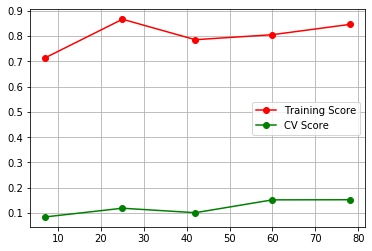

In [161]:
plt.plot(train_sizes, train_scores_mean, 'o-', color='red', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='CV Score')
plt.legend()
plt.grid()